In [1]:
#https://www.udemy.com/course/machinelearning/learn/lecture/19534152#overview
#https://www.javatpoint.com/hierarchical-clustering-in-machine-learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
# Here we will extract only the matrix of features as we don't have any further information about the dependent variable

X = data.iloc[:,[3,4]].values
X.shape

# Here we have extracted only 3 and 4 columns as we will use a 2D plot to see the clusters. So, we are considering the 
# Annual income and spending score as the matrix of features.

(200, 2)

### Finding the optimal number of clusters using the Dendrogram

 * Now we will find the optimal number of clusters using the Dendrogram for our model. For this, we are going to use "scipy" library as it provides a function that will directly return the dendrogram for our code.

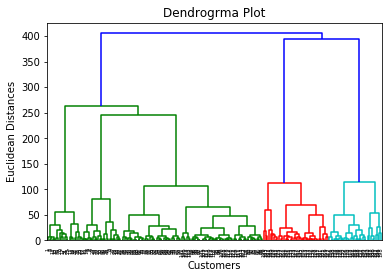

In [21]:
# from scipy.cluster import hierarchy as sch

import scipy.cluster.hierarchy as sch  
dendro = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

* In the above lines of code, we have imported the hierarchy module of scipy library. This module provides us a method shc.denrogram(), which takes the linkage() as a parameter. The linkage function is used to define the distance between two clusters, so here we have passed the x(matrix of features), and method "ward," the popular method of linkage in hierarchical clustering.

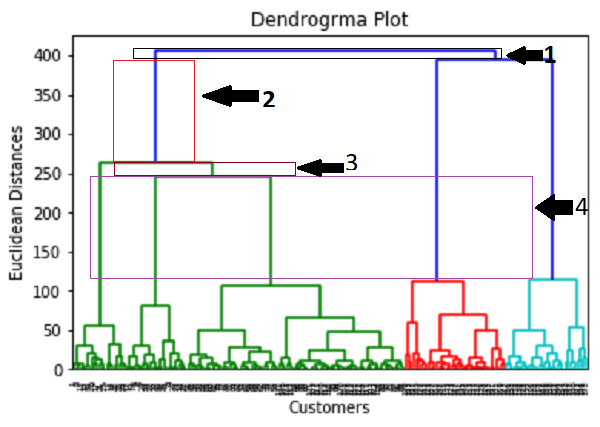

* In the above diagram, we have shown the vertical distances that are not cutting their horizontal bars. As we can visualize, the 4th distance is looking the maximum, so according to this, the number of clusters will be 5(the vertical lines in this range). We can also take the 2nd number as it approximately equals the 4th distance, but we will consider the 5 clusters because the same we calculated in the K-means algorithm.

So, the optimal number of clusters will be 5

### Training the hierarchical clustering model

In [24]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(X) 
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [26]:
data['CustomerID'].head()

0    1
1    2
2    3
3    4
4    5
Name: CustomerID, dtype: int64

* As we can see in the above image, the y_pred shows the clusters value, which means the customer id 1 belongs to the 5th cluster (as indexing starts from 0, so 4 means 5th cluster), the customer id 2 belongs to 4th cluster, and so on.

### Visualising the Cluster

* As we have trained our model successfully, now we can visualize the clusters corresponding to the dataset. Here we will use the same lines of code as we did in k-means clustering, except one change. Here we will not plot the centroid that we did in k-means, because here we have used dendrogram to determine the optimal number of clusters.

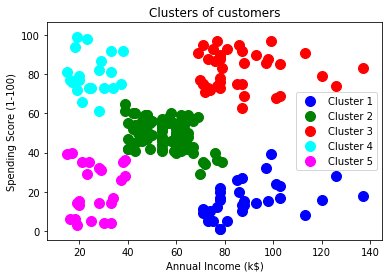

In [27]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(X[y_pred== 2, 0], X[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  